# Chapter 7

## 7.8

In [1]:
from bandit_instance import GaussianBandit

In [7]:
import numpy as np
import math

def UCB(bandit, n, delta, seed=541):
    """
    Implementation of the UCB algorithm (algorithm 3 in Lattimore 2018)
    -----
    bandit: the bandit instance
    n: time horizon
    delta: confidence level
    """

    rng = np.random.default_rng(seed)
    
    K = bandit.K()

    reward_history = {}

    # pull each arm once
    arm_UCB = np.zeros(K)
    for a in range(K):
        reward_history[a] = [bandit.pull(a)]
        arm_UCB[a] = np.mean(reward_history[a]) + math.sqrt(-2 * math.log(delta) / len(reward_history[a]))

    for t in range(K, n):
        arm_to_pull = np.argmax(arm_UCB)
        reward_history[arm_to_pull].append(bandit.pull(arm_to_pull))
        arm_UCB[arm_to_pull] = np.mean(reward_history[arm_to_pull]) + math.sqrt(-2 * math.log(delta) / len(reward_history[arm_to_pull]))

In [8]:
from algorithm import ExploreThenCommit, FindOptimalM
gaps = np.arange(0.01, 1, 0.01)
n = 1000
N = 5000

regret_log = {"25": [], "50": [], "75": [], "100": [], "optimal": [], "UCB": []}
avg_regret_log = {"25": [], "50": [], "75": [], "100": [], "optimal": [], "UCB": []}

for gap in gaps:
    regret_log = {"25": [], "50": [], "75": [], "100": [], "optimal": [], "UCB": []}
    optimal_m = FindOptimalM(n, gap)
    for seed in range(N):
        # UCB
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        UCB(bandit, n, 1 / n ** 2, seed)
        regret_log["UCB"].append(bandit.regret()["pseudo"])

        # m = 25
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, 25, seed)
        regret_log["25"].append(bandit.regret()["pseudo"])

        # m = 25
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, 50, seed)
        regret_log["50"].append(bandit.regret()["pseudo"])

        # m = 75
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, 75, seed)
        regret_log["75"].append(bandit.regret()["pseudo"])

        # m = 100
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, 100, seed)
        regret_log["100"].append(bandit.regret()["pseudo"])

        # optimal m
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, optimal_m, seed)
        regret_log["optimal"].append(bandit.regret()["pseudo"])

    avg_regret_log["25"].append(np.mean(regret_log["25"]))
    avg_regret_log["50"].append(np.mean(regret_log["50"]))
    avg_regret_log["75"].append(np.mean(regret_log["75"]))
    avg_regret_log["100"].append(np.mean(regret_log["100"]))
    avg_regret_log["optimal"].append(np.mean(regret_log["optimal"]))
    avg_regret_log["UCB"].append(np.mean(regret_log["UCB"]))


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_24208\2843296710.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


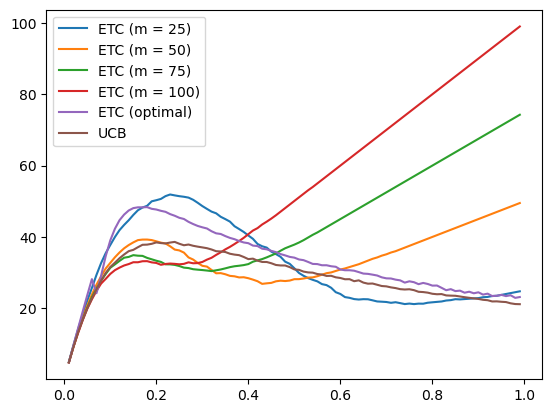

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(gaps, avg_regret_log["25"], label="ETC (m = 25)")
ax.plot(gaps, avg_regret_log["50"], label="ETC (m = 50)")
ax.plot(gaps, avg_regret_log["75"], label="ETC (m = 75)")
ax.plot(gaps, avg_regret_log["100"], label="ETC (m = 100)")
ax.plot(gaps, avg_regret_log["optimal"], label="ETC (optimal)")
ax.plot(gaps, avg_regret_log["UCB"], label="UCB")
ax.legend()
fig.show()